In [1]:
#Make sure you're in the correct directory

In [1]:
import os
os.chdir('../')
os.getcwd()

'/Users/olgadorabiala/Documents/Thesis/RPCA'

In [5]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn import datasets
import matplotlib.pyplot as plt
from EPCA import EPCA
from plotting_functions import plot_compare_methods, plot_epca_trials
from helper_functions import create_noisy_datasets

%matplotlib inline

# Load sklearn datasets

In [6]:
from sklearn import datasets

data_dict = {
        "iris": datasets.load_iris(),
        "wine": datasets.load_wine(),
        "breast_cancer": datasets.load_breast_cancer(),
    }

    

# Compare performance of three methods

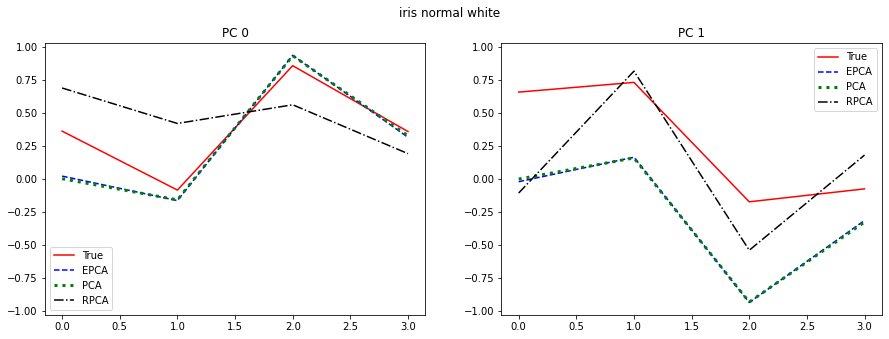

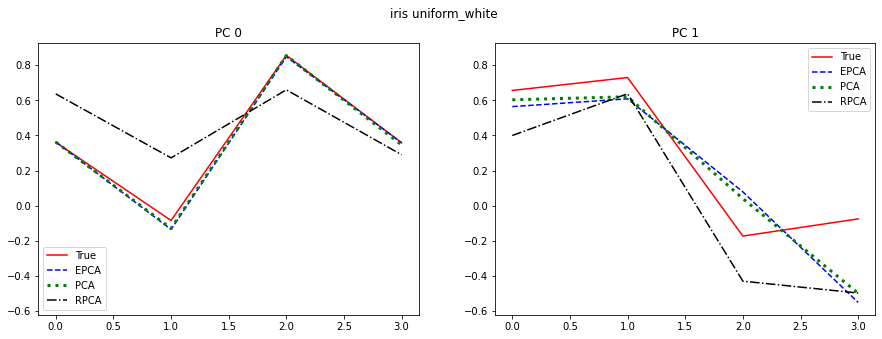

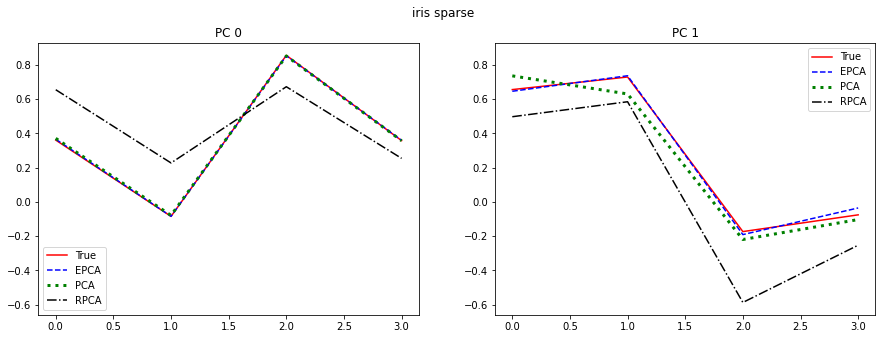

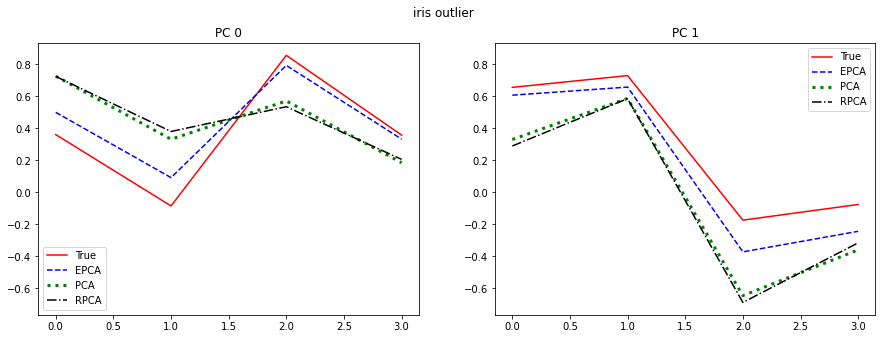

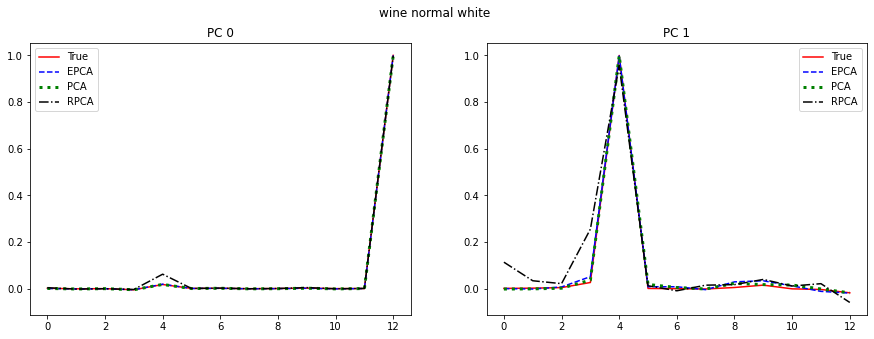

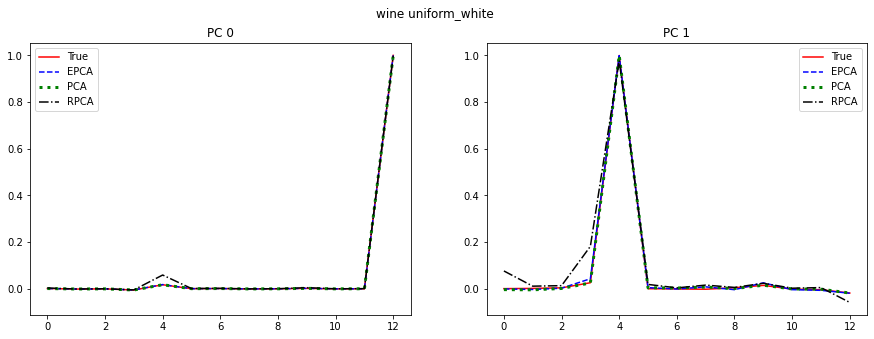

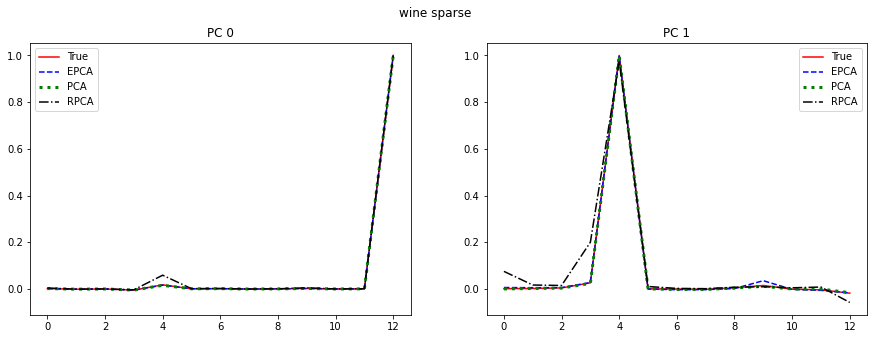

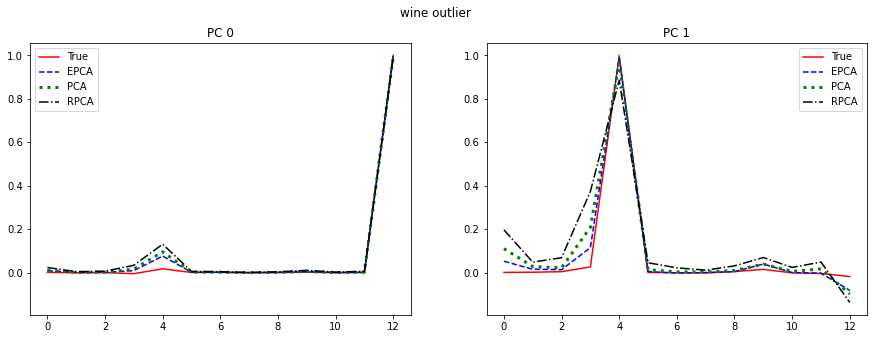

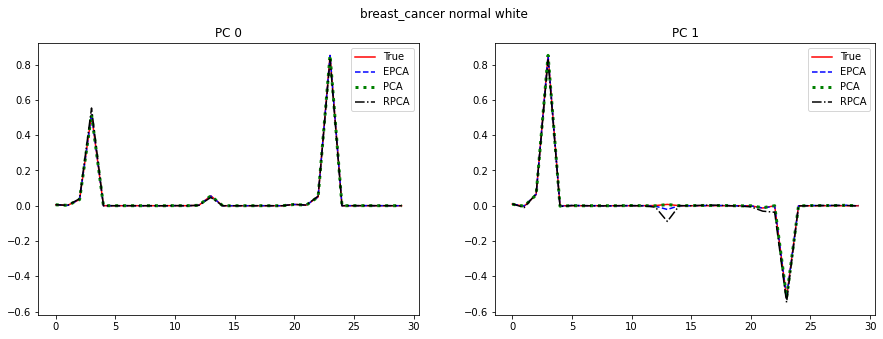

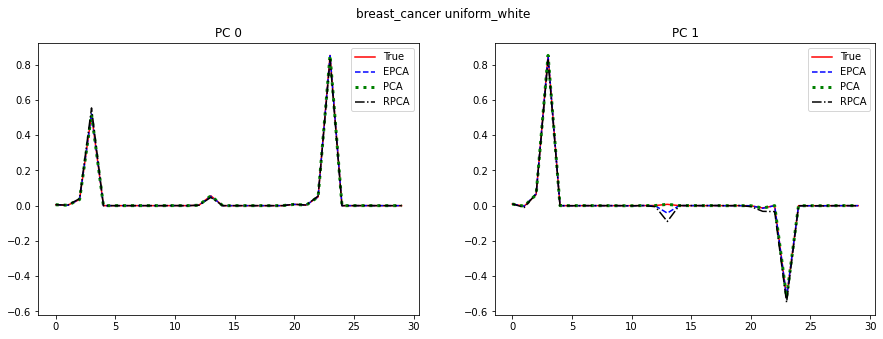

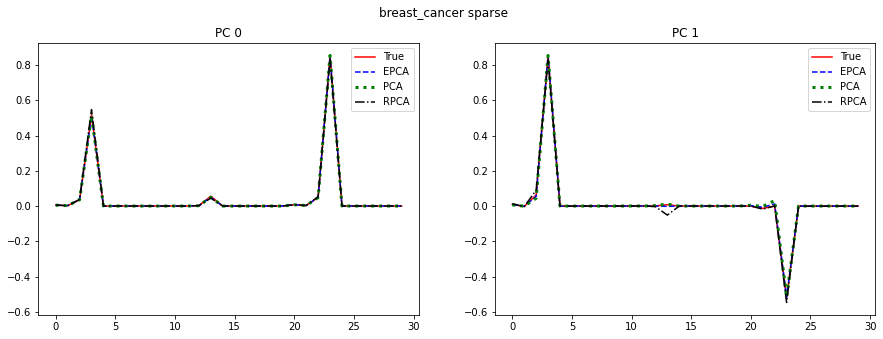

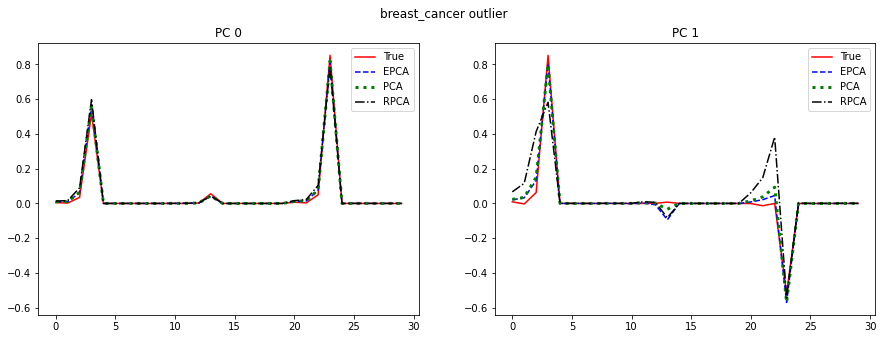

In [7]:
rpca_args = {'reg_E': .20}
pca_args = {}

for index, dataset in enumerate(data_dict.keys()):
    data = data_dict[dataset].data
    n,m = data.shape
    
    epca_args = [{
                "num_bags":100,
                "bag_size": max(5, n // 10),
            },
            
            {
                "num_bags": 100,
                "bag_size": max(5, n // 10),
            },
            {
                "num_bags":100,
                "bag_size": max(5, n // 10),
            },
           {
                "num_bags": 100,
                "bag_size": min(5, n // 10),
            },]
    
    normal_white_data, uniform_white_data, sp_data, outlier_data = create_noisy_datasets(data, 
                                                                                    sp_probability = .01,
                                                                                    uniform_white_variance = 2, #max(np.average(data), 2) * 2,
                                                                                    normal_white_variance = 2, #max(np.average(data), 2) * 2,
                                                                                    outlier_scale = 5,
                                                                                    outlier_fraction = .10)
    
    
    pca = PCA(n_components = 2)
    pca.fit(data)
    true_components = pca.components_
    data_type = ['normal white', 'uniform_white', 'sparse', 'outlier']
    
    for index_2, input_data in enumerate([normal_white_data, uniform_white_data, sp_data, outlier_data]):
        fig = plot_compare_methods(num_components = 2, epca_args = epca_args[index_2], pca_args = pca_args,
                             rpca_args = rpca_args, input_data = input_data, true_components = true_components)

        fig.suptitle(dataset + ' ' + data_type[index_2])

    

# Plot performance of EPCA

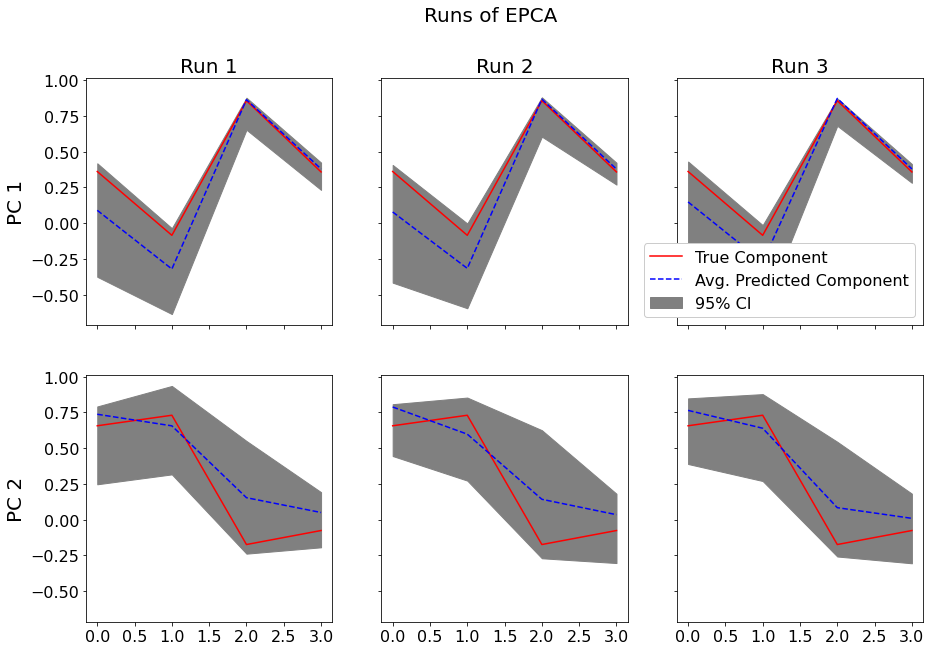

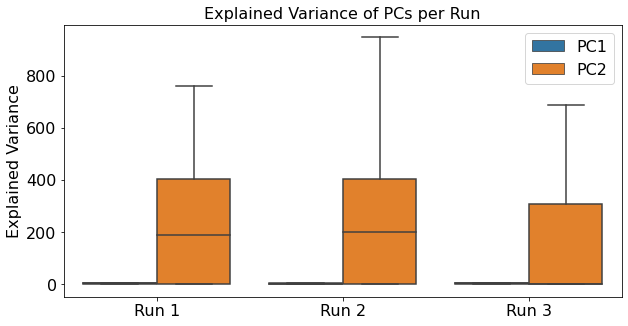

In [8]:
og_data = data_dict['iris'].data
n,m = og_data.shape

normal_white_data, uniform_white_data, sp_data, outlier_data = create_noisy_datasets(og_data, 
                                                                                    sp_probability = .01,
                                                                                    uniform_white_variance = 2, #max(np.average(data), 2) * 2,
                                                                                    normal_white_variance = 2, #max(np.average(data), 2) * 2,
                                                                                    outlier_scale = 10,
                                                                                    outlier_fraction = .05)
    
    
pca = PCA(n_components = 2)
pca.fit(og_data)
true_components = pca.components_


input_data= outlier_data
epca_args = {
            "num_bags": 100,
            "bag_size": max(5, n // 10),
            "num_components": 2,
        }

fig = plot_epca_trials(epca_args, num_trials = 3, input_data = input_data, 
                      true_components = true_components, root_filename = 'temp', show_outliers = False)